In [1]:
import numpy as np
import pandas as pd
#? pandas is a special module for read data files
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('position_salaries_data.csv')
data.describe()
#? Statistical information about the data

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [3]:
data.info()
#? information about the data's type, num of values, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.head()
#? show us top 5 rows of the data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
data
#? show the all of the values

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


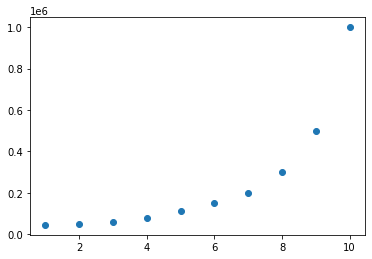

In [6]:
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])
#? visualize the values to know what degree is better

In [7]:
#? we should in first step mapping the data
def poly(x, degree):
    n, m = x.shape
    #? extract dimensions of the x with x.shape
    res = np.empty((n, m * degree + 1))
    #? we create an empty matrix
    # with n rows and m * degree + 1(+1 is for x0) columns
    res[:, 0] = np.ones(n)
    # every row in column 0 is 1
    for i in range(1, degree + 1):
    # we specify start and end points (for power ^)
        for j in range(m):
        # so we apply the power for all features
            res[:, (i - 1) * m + j + 1] = np.power(x[:, j], i)
            # all rows column j powered to i
    return res

# test = np.array([[2,4],[3,6]])
# test_poly = poly(test,3)
# test_poly.shape

In [8]:
#? next step is standardization features
# in here for example salary has a big range of values
# but the levels are ok

x = data.iloc[:, 1:2].values
#? iloc means index location and return to us dataframe
# we should use from .values for access to indexes
y = data.iloc[:, -1].values
y = y.reshape(-1, 1)
x_poly1 = poly(x, 1)
x_poly2 = poly(x, 2)
x_poly3 = poly(x, 3)
y_std = (y - y.min()) / (y.max() - y.min())
#? a solution for standardization
# we mapping standardization salary values
y_std

array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])

In [9]:
#? this is GD.py by one differance
def gradient_descent(x, y, epochs, alpha, eps=0.001):
    w = np.random.randn(x.shape[1], 1)
    epoch = 1
    loss_history = []
    while True:
        y_hat = np.dot(x, w)  # Xw ==> X@w
        error = y_hat - y
        loss = (1.0 / x.shape[0]) * error.T @ error  # MSE(loss) => 1/(n)*(y_hat-y).T@(y_hat-y)
        loss_history.append(loss[0][0])
        w -= 2 * alpha * x.T @ error  # w -= alpha*X.T(Xw-y)
        if epoch % 100000 == 0:
            print(f'Epoch [{epoch}/{epochs}]: loss = {loss}')
        if epoch > epochs or loss_history[-1] < eps:
            break
        epoch += 1
    return w, loss_history

Epoch [100000/10000000]: loss = [[0.3539888]]
Epoch [200000/10000000]: loss = [[0.28722187]]
Epoch [300000/10000000]: loss = [[0.23314833]]
Epoch [400000/10000000]: loss = [[0.18935471]]
Epoch [500000/10000000]: loss = [[0.15388641]]
Epoch [600000/10000000]: loss = [[0.12516047]]
Epoch [700000/10000000]: loss = [[0.10189494]]
Epoch [800000/10000000]: loss = [[0.08305158]]
Epoch [900000/10000000]: loss = [[0.06778958]]
Epoch [1000000/10000000]: loss = [[0.055428]]
Epoch [1100000/10000000]: loss = [[0.04541537]]
Epoch [1200000/10000000]: loss = [[0.03730507]]
Epoch [1300000/10000000]: loss = [[0.03073541]]
Epoch [1400000/10000000]: loss = [[0.02541346]]
Epoch [1500000/10000000]: loss = [[0.021102]]
Epoch [1600000/10000000]: loss = [[0.0176089]]
Epoch [1700000/10000000]: loss = [[0.01477858]]
Epoch [1800000/10000000]: loss = [[0.01248501]]
Epoch [1900000/10000000]: loss = [[0.01062616]]
Epoch [2000000/10000000]: loss = [[0.00911937]]
Epoch [2100000/10000000]: loss = [[0.00789772]]
Epoch [

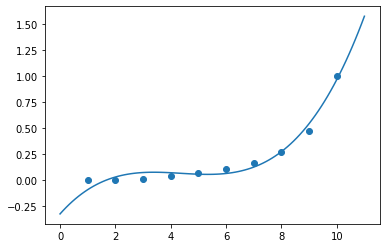

In [10]:
#? if we increase the alpha and epochs but the loss not very decreased
# we should upgrade degree
w, losses = gradient_descent(x_poly3, y_std, 10000000, 0.0000001)
# w
xx = np.linspace(x.min() - 1, x.max() + 1, 100).reshape(-1, 1)
xx_poly = poly(xx, 3)
yy = np.dot(xx_poly, w)
plt.scatter(x, y_std)
plt.plot(xx, yy)


In [11]:
w

# array([[-0.11826578],  => for ^0
#        [ 0.14799228],  => for ^1
#        [-0.04283191],  => for ^2
#        [ 0.0038626 ]]) => for ^3

array([[-0.32510608],
       [ 0.30038011],
       [-0.07245083],
       [ 0.00553357]])